# CQC DATA Invest

## license

Before delving into the data, i need to mention that both the FSA and the CQC data are licensed under the Open Government Licence v3.0, which allows users to copy, publish, distribute, and transmit the data, to adapt the data ,and to use the data commercially.

One good aspect about both datasets is that the data is free to use, which promotes transparency; however, the documentation is poor, making it hard to identify a clear statement of what specific data is available and how it is structured.

In [180]:
# We'll load a couple of libraries that we'll be using in this Notebook.
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
from statsmodels.graphics.mosaicplot import mosaic
import folium
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial.distance import cosine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import geopy
from geopy.geocoders import Nominatim


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# Exploration of the data and its features 

In [95]:
!ls data/

cqc_ratings_all_01_May_2024.csv  mk.geoJSON.txt  tma02-q1-mongo-fsa.zip


In [96]:
#looking at the data before importing it
!head -n 5 data/cqc_ratings_all_01_May_2024.csv

﻿Location ID,Location ODS Code,Location Name,Care Home?,Location Type,Location Primary Inspection Category,Location Street Address,Location Address Line 2,Location City,Location Post Code,Location Local Authority,Location Region,Location NHS Region,Location ONSPD CCG Code,Location ONSPD CCG,Location Commissioning CCG Code,Location Commissioning CCG Name,Service / Population Group,Domain,Latest Rating,Publication Date,Report Type,Inherited Rating (Y/N),URL,Provider ID,Provider Name,Brand ID,Brand Name
1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,,Ipswich,IP1 6TB,Suffolk,East of England,East of England,E38000086,NHS Ipswich and East Suffolk CCG,,,Overall,Safe,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,,Ipswich,IP1 6TB,Suffolk,East of England,East of England,E38000

In [97]:
cqc_df = pd.read_csv("data/cqc_ratings_all_01_May_2024.csv")
cqc_df.head()

,Location ID,Location ODS Code,Location Name,Care Home?,Location Type,Location Primary Inspection Category,Location Street Address,Location Address Line 2,Location City,Location Post Code,...,Domain,Latest Rating,Publication Date,Report Type,Inherited Rating (Y/N),URL,Provider ID,Provider Name,Brand ID,Brand Name
0,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Safe,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
1,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Effective,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
2,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Caring,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
3,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Responsive,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
4,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Well-led,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves


In [98]:
cqc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259005 entries, 0 to 259004
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Location ID                           259005 non-null  object
 1   Location ODS Code                     216187 non-null  object
 2   Location Name                         259005 non-null  object
 3   Care Home?                            259005 non-null  object
 4   Location Type                         259005 non-null  object
 5   Location Primary Inspection Category  259005 non-null  object
 6   Location Street Address               259005 non-null  object
 7   Location Address Line 2               147745 non-null  object
 8   Location City                         259005 non-null  object
 9   Location Post Code                    259005 non-null  object
 10  Location Local Authority              259005 non-null  object
 11  Location Regi

We know that we only need the data where the column `Care Home?` has the value `Y`

In [99]:
care_home_df = cqc_df.loc[cqc_df['Care Home?'] == "Y", :]
care_home_df.head()

,Location ID,Location ODS Code,Location Name,Care Home?,Location Type,Location Primary Inspection Category,Location Street Address,Location Address Line 2,Location City,Location Post Code,...,Domain,Latest Rating,Publication Date,Report Type,Inherited Rating (Y/N),URL,Provider ID,Provider Name,Brand ID,Brand Name
0,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Safe,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
1,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Effective,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
2,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Caring,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
3,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Responsive,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
4,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Well-led,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves


In [100]:
#making sure there is no other values in the Care Home? column besides Y
set(care_home_df["Care Home?"])

{'Y'}

We can not observe all of the columns and their values thus i will load the file in Mongo DB to have an idea on what the data in all of the data looks like.

We only need the residential care home establishments 

In [101]:
care_home_df = cqc_df.loc[cqc_df['Location Primary Inspection Category'] == "Residential social care", :]
care_home_df.head()

,Location ID,Location ODS Code,Location Name,Care Home?,Location Type,Location Primary Inspection Category,Location Street Address,Location Address Line 2,Location City,Location Post Code,...,Domain,Latest Rating,Publication Date,Report Type,Inherited Rating (Y/N),URL,Provider ID,Provider Name,Brand ID,Brand Name
0,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Safe,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
1,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Effective,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
2,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Caring,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
3,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Responsive,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves
4,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Well-led,Good,20/04/2022,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves


In [102]:
care_home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84913 entries, 0 to 258992
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Location ID                           84913 non-null  object
 1   Location ODS Code                     84907 non-null  object
 2   Location Name                         84913 non-null  object
 3   Care Home?                            84913 non-null  object
 4   Location Type                         84913 non-null  object
 5   Location Primary Inspection Category  84913 non-null  object
 6   Location Street Address               84913 non-null  object
 7   Location Address Line 2               40266 non-null  object
 8   Location City                         84913 non-null  object
 9   Location Post Code                    84913 non-null  object
 10  Location Local Authority              84913 non-null  object
 11  Location Region                 

In [103]:
care_home_df["Location Primary Inspection Category"].unique()

array(['Residential social care'], dtype=object)

In [104]:
MONGO_CONNECTION_STRING = f"mongodb://localhost:27017/"
print(f"MONGO_CONNECTION_STRING = {MONGO_CONNECTION_STRING}")

MONGO_CONNECTION_STRING = mongodb://localhost:27017/


In [105]:
from pymongo import MongoClient

In [106]:
mongo_client = MongoClient(MONGO_CONNECTION_STRING)

In [107]:
DB_NAME = "care_home" 

mongo_db = mongo_client[DB_NAME]

In [108]:
mongo_db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'care_home')

In [109]:
mongo_db.drop_collection("care_home_data")
care_home_data = mongo_db["care_home_data"]

In [110]:
care_home_data.insert_many(care_home_df.to_dict(orient="records"))
care_home_data.find_one()

{'_id': ObjectId('6822f10929df4ce8e89439f5'),
 'Location ID': '1-10000302982',
 'Location ODS Code': 'VNH4N',
 'Location Name': 'Henley House',
 'Care Home?': 'Y',
 'Location Type': 'Social Care Org',
 'Location Primary Inspection Category': 'Residential social care',
 'Location Street Address': '333 Henley Road',
 'Location Address Line 2': nan,
 'Location City': 'Ipswich',
 'Location Post Code': 'IP1 6TB',
 'Location Local Authority': 'Suffolk',
 'Location Region': 'East of England',
 'Location NHS Region': 'East of England',
 'Location ONSPD CCG Code': 'E38000086',
 'Location ONSPD CCG': 'NHS Ipswich and East Suffolk CCG',
 'Location Commissioning CCG Code': nan,
 'Location Commissioning CCG Name': nan,
 'Service / Population Group': 'Overall',
 'Domain': 'Safe',
 'Latest Rating': 'Good',
 'Publication Date': '20/04/2022',
 'Report Type': 'Location',
 'Inherited Rating (Y/N)': 'N',
 'URL': 'http://www.cqc.org.uk/location/1-10000302982',
 'Provider ID': '1-102642938',
 'Provider Name

In [111]:
#checking if the data loaded is equal to the data in the DataFrame
care_home_data.count_documents({}) == len(care_home_df)

True

In [112]:
care_home_df.shape

(84913, 28)

In [113]:
care_home_df["Publication Date"] = pd.to_datetime(care_home_df["Publication Date"], format="%d/%m/%Y", errors="coerce")
care_home_df["Year"] = care_home_df["Publication Date"].dt.year

/tmp/ipykernel_350/3959665289.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_350/3959665289.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
care_home_df["Year"].isna().sum()

0

The dataset appears to mostly consist of categorical values as well as time series data.

## Non-numerical values

In [115]:
len(care_home_df["Location ID"].unique())

14143

In [116]:
care_home_df["Location Type"].unique()

array(['Social Care Org', 'Independent Healthcare Org',
       'Primary Medical Services', 'NHS Healthcare Organisation'],
      dtype=object)

In [117]:
care_home_df["Location Type"].value_counts()

Location Type
Social Care Org                84709
NHS Healthcare Organisation      150
Independent Healthcare Org        48
Primary Medical Services           6
Name: count, dtype: int64

In [118]:
care_home_df["Location City"].value_counts()

Location City
London           3393
Birmingham       1686
Nottingham       1308
Bristol          1104
Manchester       1032
                 ... 
Nr Warrington       6
Kelloe              6
Frizington          6
Gaydon              6
Verwood             3
Name: count, Length: 1343, dtype: int64

In [119]:
care_home_df["Location Primary Inspection Category"].unique()

array(['Residential social care'], dtype=object)

In [120]:
care_home_df["Location Primary Inspection Category"].value_counts()

Location Primary Inspection Category
Residential social care    84913
Name: count, dtype: int64

In [121]:
care_home_df["Location NHS Region"].value_counts(normalize=True)

Location NHS Region
Midlands                    0.204578
South East                  0.186623
North East and Yorkshire    0.157404
South West                  0.129434
North West                  0.120739
East of England             0.111974
London                      0.089247
Name: proportion, dtype: float64

In [122]:
care_home_df["Domain"].unique()

array(['Safe', 'Effective', 'Caring', 'Responsive', 'Well-led', 'Overall'],
      dtype=object)

After observing that the number of unique location IDs is much smaller than the total number of IDs, mainly because each establishment is rated across five different categories, I will use only the `Overall` rating for the rest of this investigation, as it makes it easier to draw inferences from the data

In [123]:
care_home_clean_df = care_home_df.loc[care_home_df["Domain"] == "Overall", :]

care_home_clean_df["Domain"].unique()

array(['Overall'], dtype=object)

In [124]:
care_home_clean_df.groupby("Year")["Location Primary Inspection Category"].value_counts()

Year  Location Primary Inspection Category
2016  Residential social care                   11
2017  Residential social care                  394
2018  Residential social care                 2020
2019  Residential social care                 3391
2020  Residential social care                 1492
2021  Residential social care                 1103
2022  Residential social care                 2156
2023  Residential social care                 3014
2024  Residential social care                  574
Name: count, dtype: int64

# First question to investigate 

Are there any trends in ratings over time , meaning are more residential care home establishments being rated “inadequate”, “Requires improvement”,  “Good”  or “Outstanding”,  in recent years?  
And are all home cares rated the same across the UK or does the location matters?


In [125]:
rating_per_year = care_home_clean_df.groupby(["Year"], as_index=False)["Latest Rating"].value_counts(normalize=True)
rating_per_year

,Year,Latest Rating,proportion
0,2016,Good,0.818182
1,2016,Requires improvement,0.181818
2,2017,Good,0.918782
3,2017,Outstanding,0.081218
4,2018,Good,0.930693
5,2018,Outstanding,0.068317
6,2018,Requires improvement,0.000990
7,2019,Good,0.881156
8,2019,Outstanding,0.066942
9,2019,Requires improvement,0.051312


In [126]:
fig = px.bar(rating_per_year,
             x="Year",
             y="proportion",
             template="plotly_white",
             color="Latest Rating",
             barmode="group",
             title="Care Homes ratings per year"
             
             
    
)

fig.show()

I believe a line chart would do a better job highlighting any trends 

In [127]:
fig = px.line(
    rating_per_year,
    x="Year",
    y="proportion",
    color="Latest Rating",
    template="plotly_white",
    title="Care Homes ratings per year",
    width=1400,
    height=600
)

# Update the y-axis to show percentages
fig.update_yaxes(tickformat=".0%")

fig.show()

We can clearly see the rapid decline in the `Good` rating from 2018 till 2024 and the rise of `Requires improvement` from 2018 and `Inadequate` from 2022 till 2024. 

### Now let's investigate the second part of my question, is there a relationship between the ratings and the Locations?

First, i will examine the regions, then delve deeper into the local authorities.

In [128]:
care_home_clean_df.groupby(["Location NHS Region"])["Latest Rating"].count()

Location NHS Region
East of England             1584
London                      1264
Midlands                    2894
North East and Yorkshire    2227
North West                  1708
South East                  2641
South West                  1831
Name: Latest Rating, dtype: int64

In [147]:
care_home_clean_df

,Location ID,Location ODS Code,Location Name,Care Home?,Location Type,Location Primary Inspection Category,Location Street Address,Location Address Line 2,Location City,Location Post Code,...,Latest Rating,Publication Date,Report Type,Inherited Rating (Y/N),URL,Provider ID,Provider Name,Brand ID,Brand Name,Year
5,1-10000302982,VNH4N,Henley House,Y,Social Care Org,Residential social care,333 Henley Road,NaN,Ipswich,IP1 6TB,...,Good,2022-04-20,Location,N,http://www.cqc.org.uk/location/1-10000302982,1-102642938,Greensleeves Homes Trust,BD201,BRAND Greensleeves,2022
17,1-10000812939,VNH4Q,Charlotte House,Y,Social Care Org,Residential social care,Church Road,Bebington,Wirral,CH63 3DZ,...,Good,2023-04-04,Location,N,http://www.cqc.org.uk/location/1-10000812939,1-101658918,Lovett Care Limited,-,-,2023
23,1-10000813008,VNH4R,Regency Care Centre,Y,Social Care Org,Residential social care,140 Lilly Hill,Whitefield,Bury,M45 7SG,...,Good,2021-07-15,Location,N,http://www.cqc.org.uk/location/1-10000813008,1-101658918,Lovett Care Limited,-,-,2021
29,1-1000210669,VM4G6,Kingswood House Nursing Home,Y,Social Care Org,Residential social care,21-23 Chapel Park Road,NaN,St Leonards On Sea,TN37 6HR,...,Requires improvement,2022-06-30,Location,N,http://www.cqc.org.uk/location/1-1000210669,1-877912132,Innowood Limited,BD398,BRAND Innomary,2022
35,1-1000401911,VL05L,Little Haven,Y,Social Care Org,Residential social care,133 Wellmeadow Road,NaN,London,SE6 1HP,...,Good,2024-03-22,Location,N,http://www.cqc.org.uk/location/1-1000401911,1-101666779,Elizabeth Peters Care Homes Limited,-,-,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258548,RXXHM,VLWE1,Rosewood,Y,NHS Healthcare Organisation,Residential social care,Farmfield,Charlwood Road,Charlwood,RH6 0BG,...,Good,2018-05-10,Location,N,http://www.cqc.org.uk/location/RXXHM,RXX,Surrey and Borders Partnership NHS Foundation ...,-,-,2018
258554,RXXZ2,VM5M7,Jasmine at Primrose,Y,NHS Healthcare Organisation,Residential social care,"Primrose 2, The Meadows",Horton Lane,Epsom,KT19 8PB,...,Good,2019-11-20,Location,N,http://www.cqc.org.uk/location/RXXZ2,RXX,Surrey and Borders Partnership NHS Foundation ...,-,-,2019
258560,RXXZ5,VM4Q1,Kingscroft,Y,NHS Healthcare Organisation,Residential social care,Worple Road,NaN,Staines Upon Thames,TW18 1ED,...,Good,2018-07-04,Location,N,http://www.cqc.org.uk/location/RXXZ5,RXX,Surrey and Borders Partnership NHS Foundation ...,-,-,2018
258986,TAH95,VM29W,Woodland View,Y,NHS Healthcare Organisation,Residential social care,1 Lightwood Lane,NaN,Sheffield,S8 8BG,...,Good,2019-12-21,Location,N,http://www.cqc.org.uk/location/TAH95,TAH,Sheffield Health and Social Care NHS Foundatio...,-,-,2019


First lets visualize it using a mosaic plot, a mosaic plot can help to informally assess whether or not the variables are likely to be independent. What’s more, mosaic plots also provide us with a visualisation of the proportions observed for each level within each variable.

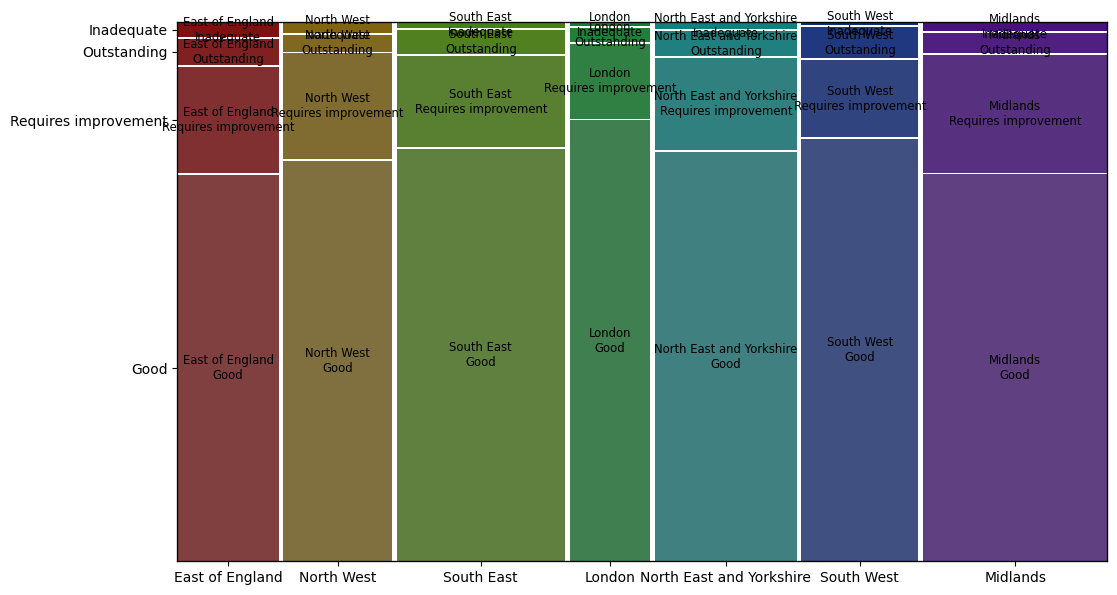

In [150]:
plt.rcParams["figure.figsize"] = [12, 7]

mosaic(care_home_clean_df.loc[care_home_clean_df["Latest Rating"] != "Insufficient evidence to rate", :], ["Location NHS Region", "Latest Rating"] )
plt.show()

When the variables are independent, the rectangles across rows have equal the same vertical length.  
Now observing the figure above we can see that the rows are do not have the same vertical length, indicating that the variables may not be independent.  
Thus, further investigation is required.

I will use the ($\chi^2$) test (*Pearson's chi-squared test*)  on a contingency table to compare actual and expected counts between various observed categories. This will tell us if there is an association between `Location NHS Region` and `Latest Rating`

In [130]:
loc_rat_crosstab = pd.crosstab(care_home_clean_df["Location NHS Region"], care_home_clean_df["Latest Rating"] )

In [131]:
loc_rat_crosstab

Latest Rating,Good,Inadequate,Insufficient evidence to rate,Outstanding,Requires improvement
Location NHS Region,,,,,
East of England,1146,43,0,79,316
London,1044,10,0,32,178
Midlands,2098,48,0,109,639
North East and Yorkshire,1707,30,0,104,386
North West,1281,34,1,54,338
South East,2042,30,0,120,449
South West,1449,11,0,106,265


I will drop the `Insufficient evidence to rate` column for two reasons.  
First, it does not provide any meaningful information for our analysis.  
Second, its inclusion would result in expected frequencies below 5, violating the rule of thumb for the chi-squared test.

In [132]:
loc_rat_crosstab.drop(["Insufficient evidence to rate"], axis=1, inplace=True)

In [133]:
_array = scipy.stats.contingency.expected_freq(loc_rat_crosstab)
pd.DataFrame(_array, columns=loc_rat_crosstab.columns).set_index(loc_rat_crosstab.index)

Latest Rating,Good,Inadequate,Outstanding,Requires improvement
Location NHS Region,,,,
East of England,1205.465649,23.063613,67.623410,287.847328
London,961.937235,18.404297,53.962115,229.696353
Midlands,2202.410093,42.137687,123.549336,525.902884
North East and Yorkshire,1694.805556,32.425926,95.074074,404.694444
North West,1299.071883,24.854538,72.874470,310.199109
South East,2009.870441,38.453916,112.748374,479.927269
South West,1393.439143,26.660023,78.168222,332.732612


In [134]:
scipy.stats.chi2_contingency(loc_rat_crosstab)
chi2, p, _, _ = scipy.stats.chi2_contingency(loc_rat_crosstab)
f"chi2: {chi2}, p: {p}"

'chi2: 140.95711467752255, p: 4.187494005708594e-21'

The p-value of 4.187494005708594e-21, a very small value, suggests that the observed values are highly unlikely to have been the result of chance, and means that we can reject the null hypothesis that there is no association between `Location NHS Region` and `Latest Rating`. This means that the distribution of ratings is not the same across all regions and that some locations tend to have better or worse ratings than others.

I will now examine whether there are differences between the local authorities in terms of the distribution of their ratings.

In [135]:
pd.crosstab(care_home_clean_df["Location Local Authority"], care_home_clean_df["Latest Rating"]).drop(["Insufficient evidence to rate"], axis=1)

Latest Rating,Good,Inadequate,Outstanding,Requires improvement
Location Local Authority,,,,
Barking and Dagenham,21,0,0,1
Barnet,63,1,1,10
Barnsley,48,1,3,19
Bath and North East Somerset,38,1,0,11
Bedford,46,1,3,21
...,...,...,...,...
Wirral,71,3,0,34
Wokingham,37,1,5,6
Wolverhampton,47,1,1,18


In [136]:
Auth_rat_crosstab = pd.crosstab(care_home_clean_df["Location Local Authority"], care_home_clean_df["Latest Rating"]).drop(["Insufficient evidence to rate"], axis=1)

In [137]:
Auth_rat_crosstab.head()

Latest Rating,Good,Inadequate,Outstanding,Requires improvement
Location Local Authority,,,,
Barking and Dagenham,21,0,0,1
Barnet,63,1,1,10
Barnsley,48,1,3,19
Bath and North East Somerset,38,1,0,11
Bedford,46,1,3,21


In [138]:
base_Auth_rat_crosstab = Auth_rat_crosstab.copy()

We can use the elbow method graphical method to find the optimal K value which determines the number of clusters.

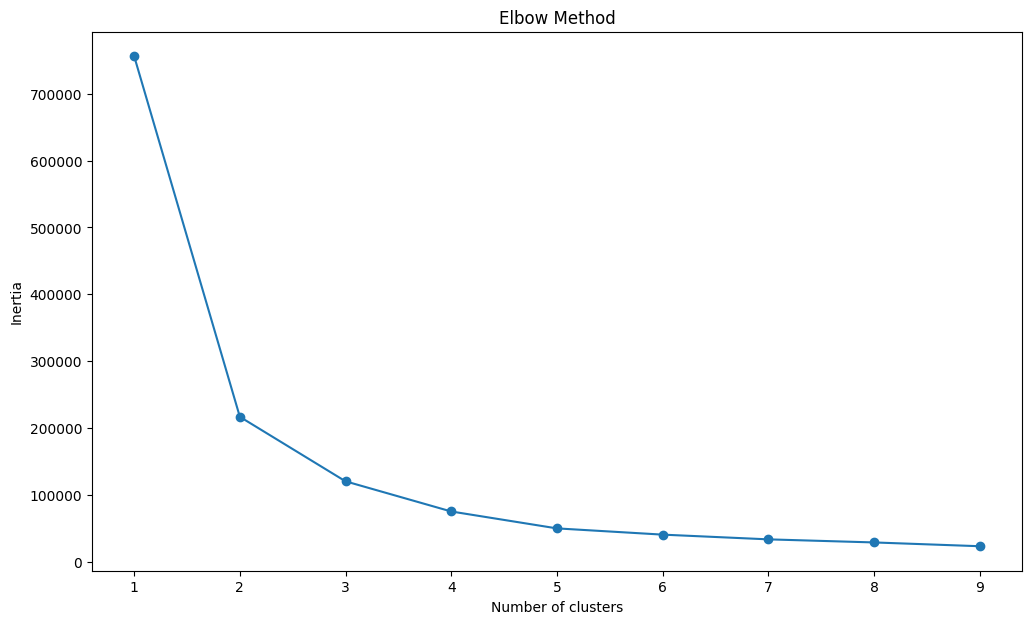

In [139]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(Auth_rat_crosstab)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

From the figure above we can see that it is reasonable to use 3 clusters for our data.

In [140]:
# First, create an instance of the clusterer with k=3
kmeans3 = KMeans(n_clusters=3)

# Then call the fit function on the clusterer to fit the data to the 3 means.
assignedClusters_clust = kmeans3.fit(Auth_rat_crosstab)

Auth_rat_crosstab["3means_cluster"] = assignedClusters_clust.labels_

Auth_rat_crosstab.head()

Latest Rating,Good,Inadequate,Outstanding,Requires improvement,3means_cluster
Location Local Authority,,,,,
Barking and Dagenham,21,0,0,1,0
Barnet,63,1,1,10,0
Barnsley,48,1,3,19,0
Bath and North East Somerset,38,1,0,11,0
Bedford,46,1,3,21,0


Next, I will evaluate the suitability of three clusters by examining a silhouette plot.  

In [141]:
Auth_rat_crosstab.sum()

Latest Rating
Good                    10772
Inadequate                206
Outstanding               604
Requires improvement     2572
3means_cluster             77
dtype: int64

In [161]:
scores_df = Auth_rat_crosstab.groupby("3means_cluster")[["Good","Requires improvement"]].sum()

In [162]:
scores_df

Latest Rating,Good,Requires improvement
3means_cluster,,
0,3968,975
1,3635,890
2,3169,707


In [166]:
scores_df.columns.values

array(['Good', 'Requires improvement'], dtype=object)

In [178]:
def percetnages(df):
    for index, row in df.iterrows():
        total = row["Good"] + row["Requires improvement"]
        percentage_improvement = (row["Requires improvement"] / total) * 100
        print(f"Cluster {index}: {percentage_improvement}" + " requires improvement")
percetnages(scores_df)

Cluster 0: 19.724863443253085 requires improvement
Cluster 1: 19.66850828729282 requires improvement
Cluster 2: 18.24045407636739 requires improvement


We can see that most of the data are concentrated in two columns, so we will use these columns in our silhouette plot

In [142]:
Auth_rat_crosstab["silhouette"] = silhouette_samples(
    Auth_rat_crosstab[["Good", "Requires improvement"]], Auth_rat_crosstab["3means_cluster"]
)
Auth_rat_crosstab.head()

Latest Rating,Good,Inadequate,Outstanding,Requires improvement,3means_cluster,silhouette
Location Local Authority,,,,,,
Barking and Dagenham,21,0,0,1,0,0.737894
Barnet,63,1,1,10,0,0.362172
Barnsley,48,1,3,19,0,0.632224
Bath and North East Somerset,38,1,0,11,0,0.759987
Bedford,46,1,3,21,0,0.635660


In [143]:
Auth_rat_crosstab_sorted = Auth_rat_crosstab.sort_values(
    ["3means_cluster", "silhouette"]
)

# Reset the index
Auth_rat_crosstab_sorted.reset_index(drop=True, inplace=True)

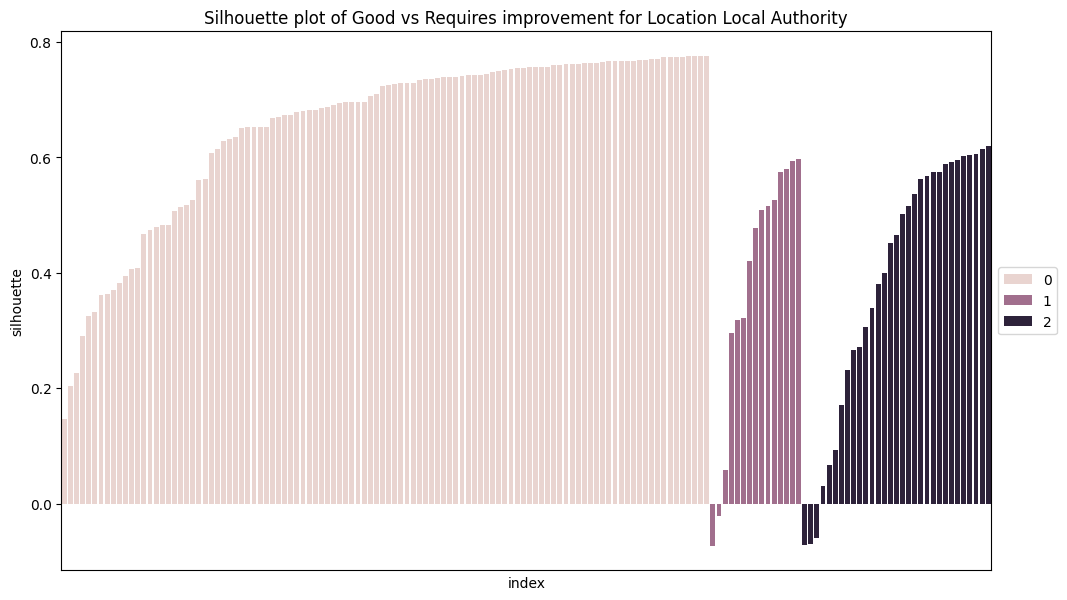

In [144]:
ax = sns.barplot(
    data=Auth_rat_crosstab_sorted.reset_index(),
    x="index",
    y="silhouette",
    hue="3means_cluster",
    # The dodge=False parameter has a useful side effect of thickening the bars
    dodge=False,
)

# Suppress the x-axis tick labels
ax.set(xticks=[], title="Silhouette plot of Good vs Requires improvement for Location Local Authority")

# Pop the legend out the the main plot frame
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5));

The dataset is dominated by one main cluster, with the remaining two clusters appearing to be a bit spread out because of the low values of their silhouette coefficients.  

Before deciding whether to increase the number of clusters or not i will examine the data using a scatterplot.

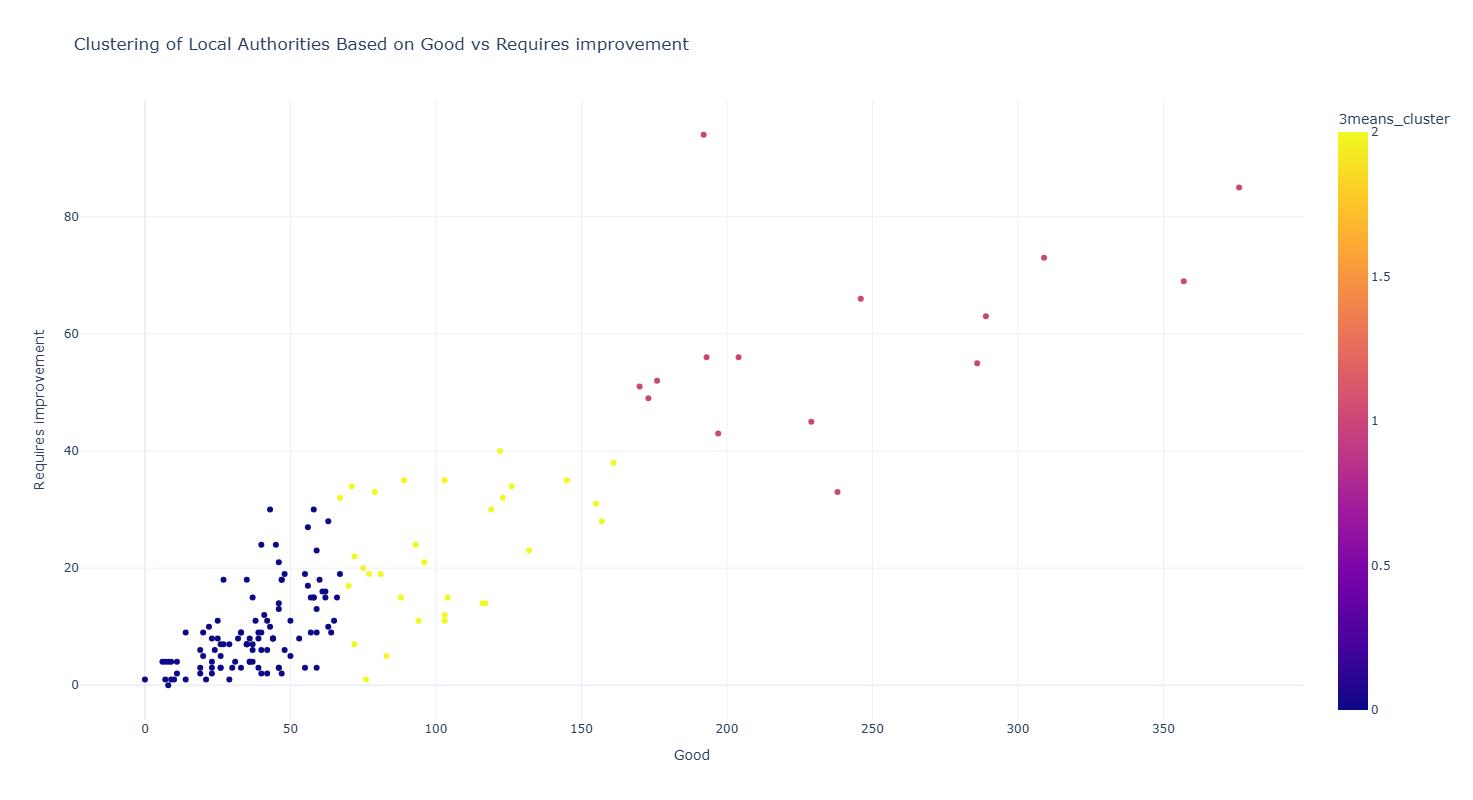

In [145]:
fig = px.scatter(Auth_rat_crosstab, 
                 x='Good', 
                 y='Requires improvement', 
                 color='3means_cluster', 
                 hover_name=Auth_rat_crosstab.index, 
                 title='Clustering of Local Authorities Based on Good vs Requires improvement',
                 template="plotly_white",
                width = 1400, 
                height=800)

fig.show()

Very interesting plot above, we can clearly see that there is a positive linear relationship between `Good` and `Requires improvement`. 

Also, we can observe that adding more clusters won't really be effective.

Another way to explore the data is by using Principal Component Analysis (PCA). Since we have more than two dimensions, which are`Good, Inadequate, Outstanding, Requires improvement`, for each local authority, visualizing the data in two dimensions is not possible. However, PCA allows us to reduce the dimensionality of the data to two principal components, making it possible to view and interpret the data in a 2D plot. This technique is used to emphasize variation and bring out strong patterns in the data, highlighting differences in rating distributions between local authorities.

The first step is to normalize the data, since PCA measures variation. Normalizing ensures that all of the scores contribute equally, allowing us to identify which local authorities deviate the most from the average pattern.

In [116]:
X = base_Auth_rat_crosstab
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Auth_rat_crosstab_preprocessed = pd.DataFrame(data=X_scaled, columns=base_Auth_rat_crosstab.columns)
Auth_rat_crosstab_preprocessed.set_index(base_Auth_rat_crosstab.index, inplace=True)
Auth_rat_crosstab_preprocessed

Latest Rating,Good,Inadequate,Outstanding,Requires improvement
Location Local Authority,,,,
Barking and Dagenham,-0.732295,-0.646089,-0.765866,-0.909491
Barnet,-0.115544,-0.169363,-0.573132,-0.395365
Barnsley,-0.335813,-0.169363,-0.187663,0.118760
Bath and North East Somerset,-0.482658,-0.169363,-0.765866,-0.338240
Bedford,-0.365182,-0.169363,-0.187663,0.233010
...,...,...,...,...
Wirral,0.001932,0.784088,-0.765866,0.975635
Wokingham,-0.497343,-0.169363,0.197807,-0.623865
Wolverhampton,-0.350497,-0.169363,-0.573132,0.061635


In [117]:
pca = PCA()
pca_data = pca.fit_transform(base_Auth_rat_crosstab)

In [118]:
Auth_rat_crosstab['PC1'] = pca_data[:, 0]
Auth_rat_crosstab['PC2'] = pca_data[:, 1]

In [119]:
Auth_rat_crosstab

Latest Rating,Good,Inadequate,Outstanding,Requires improvement,3means_cluster,silhouette,PC1,PC2
Location Local Authority,,,,,,,,
Barking and Dagenham,21,0,0,1,0,0.737894,-52.325276,-4.244334
Barnet,63,1,1,10,0,0.362172,-9.376004,-4.763187
Barnsley,48,1,3,19,0,0.632224,-21.842628,7.088018
Bath and North East Somerset,38,1,0,11,0,0.759987,-33.528572,1.785504
Bedford,46,1,3,21,0,0.635660,-23.340478,9.463464
...,...,...,...,...,...,...,...,...
Wirral,71,3,0,34,2,0.092350,3.763749,16.968214
Wokingham,37,1,5,6,0,0.768941,-35.344092,-3.229478
Wolverhampton,47,1,1,18,0,0.652895,-23.150158,6.499136


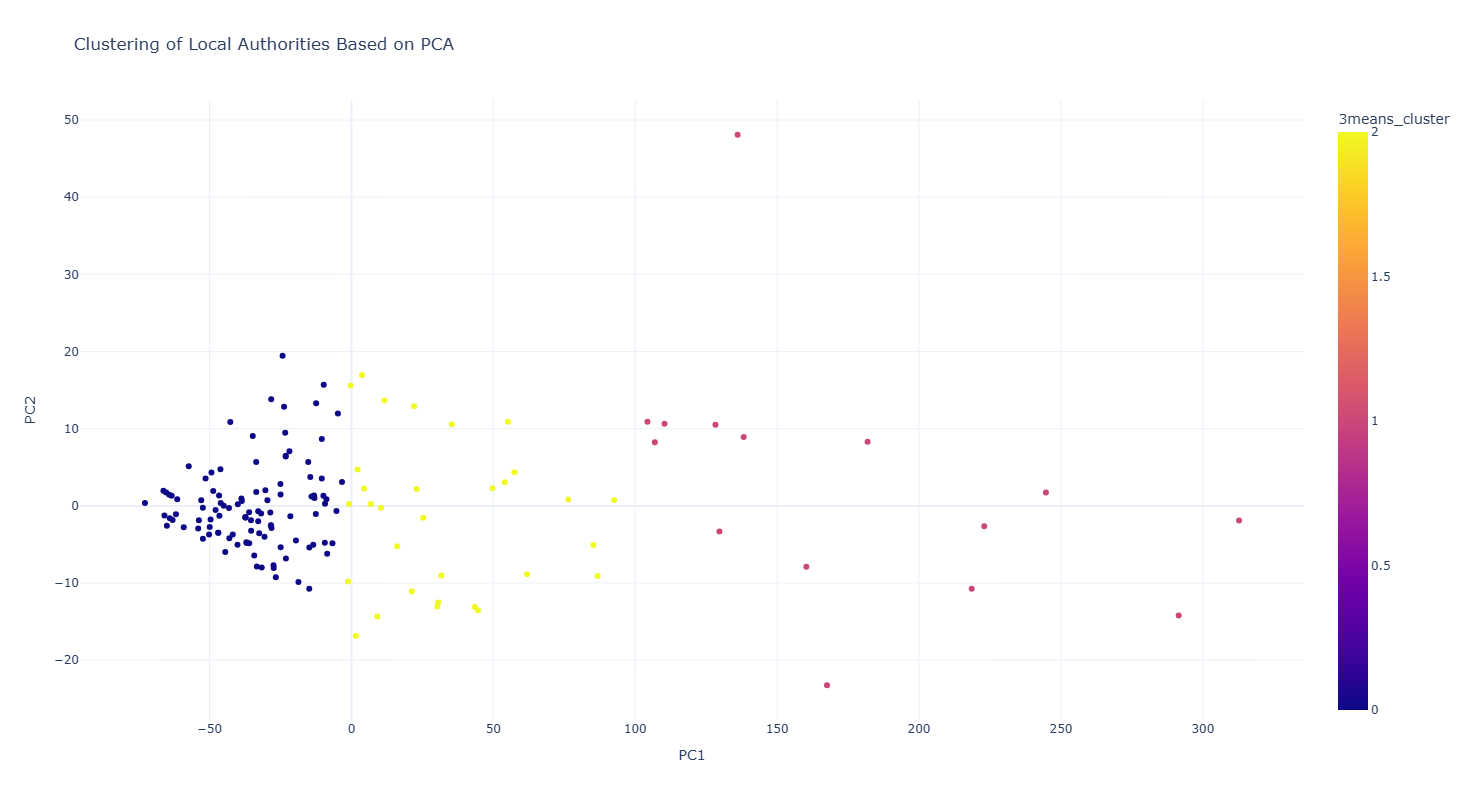

In [120]:
fig = px.scatter(Auth_rat_crosstab, 
                 x='PC1', 
                 y='PC2', 
                 color='3means_cluster', 
                 hover_name=Auth_rat_crosstab.index,
                 hover_data = ["Outstanding", "Good", "Requires improvement", "Inadequate"],
                 title='Clustering of Local Authorities Based on PCA',
                 template="plotly_white",
                width = 1400, 
                height=800)

fig.show()

Almost all of the points lie in a range between -20 and 20 for PC2, except for two local authorities `Devon` and `Norfolk`.  
But for PC1, we can see the values are spread out from around -50 to around 300. This wide range suggests that there's significant variation across local authorities in terms of the first principal component. From this, we can observe that the local authorities naturally group into three distinct clusters with one potential outlier `Norfolk`.

# Second question 

I will explore the relationships between the FSA and the CQC datasets

Is there a relationship between the Latest Rating of a home care establishment and the food hygiene scores of nearby establishments (e.g., restaurants, cafes, takeaways)?

In [46]:
# load the FSA dataset
!unzip -o ./data/tma02-q1-mongo-fsa.zip

Archive:  ./data/tma02-q1-mongo-fsa.zip
   creating: mongo_backups/fsa/
  inflating: mongo_backups/fsa/food_ratings_aldi.bson  
  inflating: mongo_backups/fsa/food_ratings_raw.metadata.json  
  inflating: mongo_backups/fsa/food_ratings_cleaner.metadata.json  
  inflating: mongo_backups/fsa/food_ratings_raw.bson  
  inflating: mongo_backups/fsa/food_ratings_cleaner.bson  
  inflating: mongo_backups/fsa/food_ratings_aldi.metadata.json  


In [208]:
mongo_client.list_database_names()

['CQC', 'accidents', 'admin', 'care_home', 'config', 'fsa', 'local']

In [50]:
!mongorestore --db=fsa ./mongo_backups/fsa

2025-05-03T10:08:56.290+0000	The --db and --collection flags are deprecated for this use-case; please use --nsInclude instead, i.e. with --nsInclude=${DATABASE}.${COLLECTION}
2025-05-03T10:08:56.290+0000	building a list of collections to restore from mongo_backups/fsa dir
2025-05-03T10:08:56.290+0000	reading metadata for fsa.food_ratings_aldi from mongo_backups/fsa/food_ratings_aldi.metadata.json
2025-05-03T10:08:56.290+0000	reading metadata for fsa.food_ratings_cleaner from mongo_backups/fsa/food_ratings_cleaner.metadata.json
2025-05-03T10:08:56.290+0000	reading metadata for fsa.food_ratings_raw from mongo_backups/fsa/food_ratings_raw.metadata.json
2025-05-03T10:08:56.373+0000	restoring fsa.food_ratings_raw from mongo_backups/fsa/food_ratings_raw.bson
2025-05-03T10:08:56.393+0000	restoring fsa.food_ratings_cleaner from mongo_backups/fsa/food_ratings_cleaner.bson
2025-05-03T10:08:56.413+0000	restoring fsa.food_ratings_aldi from mongo_backups/fsa/food_ratings_aldi.bson
2025-05-03T10:08:

In [182]:
mongo_client.list_database_names()

['CQC', 'accidents', 'admin', 'care_home', 'config', 'fsa', 'local']

In [183]:
DB_NAME = "fsa"
print(f"DB_NAME = {DB_NAME}")


mongo_db = mongo_client[DB_NAME]

DB_NAME = fsa


In [184]:
mongo_db.list_collection_names()

['food_ratings_aldi', 'food_ratings_cleaner', 'food_ratings_raw']

In [185]:
#now we need to connect to the food_ratings_cleaner collection 
food_ratings_cleaner = mongo_db["food_ratings_cleaner"]

In [186]:
#checking the data is loaded without any issues
list(food_ratings_cleaner.find().limit(1))

[{'_id': ObjectId('6723b730e104fe79281a9266'),
  'FHRSID': 1293318,
  'LocalAuthorityBusinessID': '91816',
  'BusinessName': '12th Street Burgers, Shakes & Dynamite Wings',
  'BusinessType': 'Restaurant/Cafe/Canteen',
  'BusinessTypeID': 1,
  'AddressLine2': '16 Garrick Walk',
  'AddressLine3': 'Central Milton Keynes',
  'AddressLine4': 'Milton Keynes',
  'PostCode': 'MK9 3PT',
  'RatingValue': '5',
  'RatingKey': 'fhrs_5_en-GB',
  'RatingDate': '2023-11-17',
  'LocalAuthorityCode': '870',
  'LocalAuthorityName': 'Milton Keynes',
  'LocalAuthorityWebSite': 'http://www.milton-keynes.gov.uk',
  'LocalAuthorityEmailAddress': 'ehfst@milton-keynes.gov.uk',
  'Scores': {'Hygiene': 0, 'Structural': 5, 'ConfidenceInManagement': 0},
  'SchemeType': 'FHRS',
  'NewRatingPending': False,
  'Geocode': {'Longitude': -0.7501625, 'Latitude': 52.0435764}}]

In [187]:
pd.DataFrame(food_ratings_cleaner.find({}, ["BusinessName","AddressLine2","BusinessType", "AddressLine3","PostCode","LocalAuthorityName", "RatingValue", "Geocode"], limit=5))

,_id,BusinessName,BusinessType,AddressLine2,AddressLine3,PostCode,RatingValue,LocalAuthorityName,Geocode
0,6723b730e104fe79281a9266,"12th Street Burgers, Shakes & Dynamite Wings",Restaurant/Cafe/Canteen,16 Garrick Walk,Central Milton Keynes,MK9 3PT,5,Milton Keynes,"{'Longitude': -0.7501625, 'Latitude': 52.0435764}"
1,6723b730e104fe79281a9267,14Forty,Restaurant/Cafe/Canteen,Pendeen Crescent,Milton Keynes,MK4 4BX,4,Milton Keynes,None
2,6723b730e104fe79281a9268,1st Stop,Retailers - other,125 Queensway,Bletchley,MK2 2DH,5,Milton Keynes,"{'Longitude': -0.72897, 'Latitude': 51.995092}"
3,6723b730e104fe79281a9269,360 Play,Restaurant/Cafe/Canteen,Roebuck Way,Knowlhill,MK5 8HL,5,Milton Keynes,"{'Longitude': -0.771821, 'Latitude': 52.021711}"
4,6723b730e104fe79281a926a,5 on it Foundation,Hospitals/Childcare/Caring Premises,304 South Row,Central Milton Keynes,MK9 2FR,5,Milton Keynes,"{'Longitude': -0.7604912, 'Latitude': 52.0352794}"


We need to use normalization to split the Geocode column into two separate columns. Additionally, we should drop the _id column, exclude any rows with missing Geocode values, and remove any entries where the RatingValue is marked as "Exempt"

In [188]:
pd.json_normalize(list(food_ratings_cleaner.find(
    {"$and" : [{"Geocode" : {"$ne" : None}}, {"RatingValue" : {"$ne" : "Exempt"}}] },
["BusinessName","BusinessType","AddressLine2", "AddressLine3","PostCode","LocalAuthorityName", "RatingValue", "Geocode"]))).drop(columns="_id").rename(columns={"Geocode.Longitude" : "Longitude", "Geocode.Latitude" :"Latitude" } )

,BusinessName,BusinessType,AddressLine2,AddressLine3,PostCode,RatingValue,LocalAuthorityName,Longitude,Latitude
0,"12th Street Burgers, Shakes & Dynamite Wings",Restaurant/Cafe/Canteen,16 Garrick Walk,Central Milton Keynes,MK9 3PT,5,Milton Keynes,-0.750162,52.043576
1,1st Stop,Retailers - other,125 Queensway,Bletchley,MK2 2DH,5,Milton Keynes,-0.728970,51.995092
2,360 Play,Restaurant/Cafe/Canteen,Roebuck Way,Knowlhill,MK5 8HL,5,Milton Keynes,-0.771821,52.021711
3,5 on it Foundation,Hospitals/Childcare/Caring Premises,304 South Row,Central Milton Keynes,MK9 2FR,5,Milton Keynes,-0.760491,52.035279
4,AA off licence,Retailers - other,184 Queensway,Bletchley,MK2 2SW,5,Milton Keynes,-0.727780,51.994917
...,...,...,...,...,...,...,...,...,...
1581,Young Ones,School/college/university,Rickley Lane,Bletchley,MK3 6EW,5,Milton Keynes,-0.751102,51.998485
1582,Yumas Kitchen,Takeaway/sandwich shop,19 Darin Court,Crownhill,MK8 0AD,5,Milton Keynes,-0.798534,52.031004
1583,Yummy Yummy,Takeaway/sandwich shop,46 Aylesbury Street,Bletchley,MK2 2BA,4,Milton Keynes,-0.716854,51.997038
1584,Zayka,Other catering premises,226 Burney Drive,Glebe Farm,MK17 8LE,5,Milton Keynes,-0.667006,52.032211


In [189]:
fsa_df = pd.json_normalize(list(food_ratings_cleaner.find(
    {"$and" : [{"Geocode" : {"$ne" : None}}, {"RatingValue" : {"$ne" : "Exempt"}}] },
["BusinessName","BusinessType","AddressLine3","PostCode","LocalAuthorityName", "RatingValue", "Geocode"]))).drop(columns="_id").rename(columns={"Geocode.Longitude" : "Longitude", "Geocode.Latitude" :"Latitude" } )
fsa_df.head()

,BusinessName,BusinessType,AddressLine3,PostCode,RatingValue,LocalAuthorityName,Longitude,Latitude
0,"12th Street Burgers, Shakes & Dynamite Wings",Restaurant/Cafe/Canteen,Central Milton Keynes,MK9 3PT,5,Milton Keynes,-0.750162,52.043576
1,1st Stop,Retailers - other,Bletchley,MK2 2DH,5,Milton Keynes,-0.728970,51.995092
2,360 Play,Restaurant/Cafe/Canteen,Knowlhill,MK5 8HL,5,Milton Keynes,-0.771821,52.021711
3,5 on it Foundation,Hospitals/Childcare/Caring Premises,Central Milton Keynes,MK9 2FR,5,Milton Keynes,-0.760491,52.035279
4,AA off licence,Retailers - other,Bletchley,MK2 2SW,5,Milton Keynes,-0.727780,51.994917


In [190]:
fsa_df.duplicated().sum()

4

In [191]:
#lets have a look at the duplicates
fsa_df[fsa_df.duplicated(keep=False)]

,BusinessName,BusinessType,AddressLine3,PostCode,RatingValue,LocalAuthorityName,Longitude,Latitude
648,KFC,Restaurant/Cafe/Canteen,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
649,KFC,Restaurant/Cafe/Canteen,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1195,Starbucks Coffee Company,Restaurant/Cafe/Canteen,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1196,Starbucks Coffee Company,Restaurant/Cafe/Canteen,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1222,Subway,Takeaway/sandwich shop,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1223,Subway,Takeaway/sandwich shop,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1482,W H Smith,Retailers - other,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159
1483,W H Smith,Retailers - other,Newport Pagnell,MK16 8DS,5,Milton Keynes,-0.749018,52.083159


The duplication in this data would come from getting the same score on different dates.  
So it would be safe to remove them since we are only interested in the relationship between the two scores 

In [192]:
fsa_df.drop_duplicates(inplace=True)
fsa_df.duplicated().sum()

0

In [193]:
fsa_df["RatingValue"].unique()

array(['5', '4', '3', 'AwaitingInspection', '2', '1', '0'], dtype=object)

In [194]:
# removing AwaitingInspection since it provides no useful information
fsa_df = fsa_df[fsa_df["RatingValue"] != "AwaitingInspection"]
fsa_df["RatingValue"].unique()

array(['5', '4', '3', '2', '1', '0'], dtype=object)

In [195]:
fsa_df.reset_index(drop=True, inplace=True)

In [196]:
fsa_df.head()

,BusinessName,BusinessType,AddressLine3,PostCode,RatingValue,LocalAuthorityName,Longitude,Latitude
0,"12th Street Burgers, Shakes & Dynamite Wings",Restaurant/Cafe/Canteen,Central Milton Keynes,MK9 3PT,5,Milton Keynes,-0.750162,52.043576
1,1st Stop,Retailers - other,Bletchley,MK2 2DH,5,Milton Keynes,-0.728970,51.995092
2,360 Play,Restaurant/Cafe/Canteen,Knowlhill,MK5 8HL,5,Milton Keynes,-0.771821,52.021711
3,5 on it Foundation,Hospitals/Childcare/Caring Premises,Central Milton Keynes,MK9 2FR,5,Milton Keynes,-0.760491,52.035279
4,AA off licence,Retailers - other,Bletchley,MK2 2SW,5,Milton Keynes,-0.727780,51.994917


In [197]:
care_home_clean_df.columns

Index(['Location ID', 'Location ODS Code', 'Location Name', 'Care Home?',
       'Location Type', 'Location Primary Inspection Category',
       'Location Street Address', 'Location Address Line 2', 'Location City',
       'Location Post Code', 'Location Local Authority', 'Location Region',
       'Location NHS Region', 'Location ONSPD CCG Code', 'Location ONSPD CCG',
       'Location Commissioning CCG Code', 'Location Commissioning CCG Name',
       'Service / Population Group', 'Domain', 'Latest Rating',
       'Publication Date', 'Report Type', 'Inherited Rating (Y/N)', 'URL',
       'Provider ID', 'Provider Name', 'Brand ID', 'Brand Name', 'Year'],
      dtype='object')

In [198]:
care_home_clean_df.duplicated().sum()

0

We only need the local authority.
And we do not need all of the columns from the CQC data to answer the question above

In [199]:
care_home_clean_df =  care_home_clean_df[[ "Location Name", "Location Type", "Location Post Code","Domain", "Latest Rating", "Location Local Authority" ]].reset_index(drop=True)
care_home_clean_df.head()

,Location Name,Location Type,Location Post Code,Domain,Latest Rating,Location Local Authority
0,Henley House,Social Care Org,IP1 6TB,Overall,Good,Suffolk
1,Charlotte House,Social Care Org,CH63 3DZ,Overall,Good,Wirral
2,Regency Care Centre,Social Care Org,M45 7SG,Overall,Good,Bury
3,Kingswood House Nursing Home,Social Care Org,TN37 6HR,Overall,Requires improvement,East Sussex
4,Little Haven,Social Care Org,SE6 1HP,Overall,Good,Lewisham


In [200]:
care_home_milton = care_home_clean_df.loc[care_home_clean_df["Location Local Authority"] == "Milton Keynes", :].reset_index(drop=True)
care_home_milton.head()

,Location Name,Location Type,Location Post Code,Domain,Latest Rating,Location Local Authority
0,Lakeview Lodge Care Home,Social Care Org,MK3 5QU,Overall,Good,Milton Keynes
1,Bay House,Social Care Org,MK46 5BD,Overall,Inadequate,Milton Keynes
2,Melrose House,Social Care Org,MK3 6PP,Overall,Good,Milton Keynes
3,Mallard House Neurological Care Centre,Social Care Org,MK8 0DZ,Overall,Good,Milton Keynes
4,Bluebirds Neurological Care Centre,Social Care Org,MK5 7FY,Overall,Good,Milton Keynes


In [201]:
care_home_milton.duplicated().sum()

0

Now in order to create a map, we will need the geo locations of these care homes.

In [202]:
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc", timeout=10)


def get_loc(dataframe_postcode):
    getLoc = loc.geocode(dataframe_postcode)
    return getLoc.latitude, getLoc.longitude

care_home_milton['Latitude'], care_home_milton['Longitude'] = zip(*care_home_milton['Location Post Code'].apply(get_loc))


In [203]:
fsa_df["PostCode"] = fsa_df["PostCode"].str.split().str[0]

In [204]:
fsa_cross =pd.crosstab(fsa_df["PostCode"], fsa_df["RatingValue"], normalize='index')

In [205]:
fsa_cross.head()

RatingValue,0,1,2,3,4,5
PostCode,,,,,,
GU14,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
MK1,0.000000,0.039216,0.000000,0.058824,0.039216,0.862745
MK10,0.012048,0.000000,0.000000,0.108434,0.168675,0.710843
MK11,0.000000,0.000000,0.013333,0.053333,0.186667,0.746667
MK12,0.000000,0.019417,0.000000,0.106796,0.174757,0.699029


In [206]:
weights = fsa_cross.columns.astype(float)
fsa_cross["WeightedAvg"] = fsa_cross.dot(weights)

In [207]:
fsa_cross.reset_index(inplace=True)

In [208]:
GEOJSON_FN = "data/mk.geoJSON.txt"

In [209]:
import json

# Load in the data as JSON
with open(GEOJSON_FN) as json_data:
    json_data = json.load(json_data)


In [210]:
geoJSON_feature_names = [f["properties"]["Name"] for f in json_data["features"]]

In [211]:
m = folium.Map(location=[52.1, -0.7599], zoom_start=10, max_zoom=15)

choropleth = folium.Choropleth(
    geo_data=GEOJSON_FN,  
    data=fsa_cross,
    columns=["PostCode", "WeightedAvg"],
    key_on="feature.properties.Name",
    fill_color="BuGn",
    fill_opacity=0.8,
    line_opacity=0.9,
).add_to(m)


rating_colors = {
    'Inadequate': 'red',
    'Requires improvement': 'orange',
    'Good': 'green',
    'Outstanding': 'darkgreen'
}



def add_marker(row, fmap):
    """Add markers to a map based on the rating value of establishment."""

    lat = row["Latitude"]
    lon = row["Longitude"]
    rating_value = str(row["Latest Rating"])

    color = rating_colors.get(rating_value)
    folium.Circle(
        location=[lat, lon],
        radius=25, 
        color=color,
        fill_opacity=2
    ).add_to(fmap)




care_home_milton.apply(add_marker, fmap=m, axis=1)
m.save("map.png")
m


The map shows that as the green shading becomes lighter, indicating lower average food hygiene ratings, there is a noticeable increase in orange circles, which represent care homes rated as "Requires improvement." This suggests a potential correlation between poorer food establishment ratings in an area and lower care home quality ratings.  

I will investigate this further by using a joint plot

In [184]:
milton_df = care_home_milton.copy()

In [185]:
milton_df["Latest Rating"].unique()

array(['Good', 'Inadequate', 'Requires improvement', 'Outstanding'],
      dtype=object)

In [186]:
dictt = {"Inadequate" :0,
        "Requires improvement" :1,
        "Good" :2,
        "Outstanding": 3}
milton_df["Latest Rating"] = milton_df["Latest Rating"].replace(dictt)

/tmp/ipykernel_355/1467053444.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [187]:
milton_df.head()

,Location Name,Location Type,Location Post Code,Domain,Latest Rating,Location Local Authority,Latitude,Longitude
0,Lakeview Lodge Care Home,Social Care Org,MK3 5QU,Overall,2,Milton Keynes,51.975900,-0.732060
1,Bay House,Social Care Org,MK46 5BD,Overall,0,Milton Keynes,52.152090,-0.704120
2,Melrose House,Social Care Org,MK3 6PP,Overall,2,Milton Keynes,52.008520,-0.744060
3,Mallard House Neurological Care Centre,Social Care Org,MK8 0DZ,Overall,2,Milton Keynes,52.023588,-0.808964
4,Bluebirds Neurological Care Centre,Social Care Org,MK5 7FY,Overall,2,Milton Keynes,52.017810,-0.772938


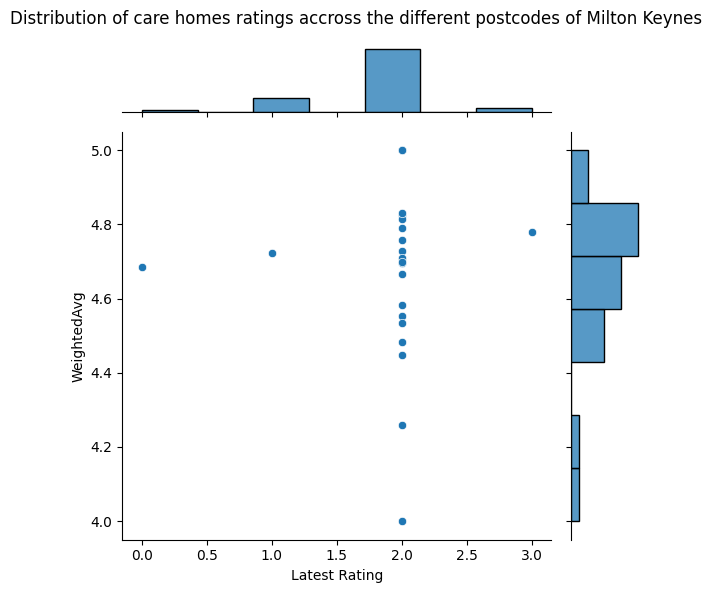

In [188]:
fig = sns.jointplot(data=milton_df, x="Latest Rating", y=fsa_cross["WeightedAvg"] )
fig.fig.suptitle("Distribution of care homes ratings accross the different postcodes of Milton Keynes")
fig.fig.tight_layout()

Now after looking at the figure above, we can observe that there is no correlation between the two.